In [2]:
import pickle
import matplotlib.pyplot as plt

file_list = ["gompertz_rmse_results.pkl","SOH_to_RUL_rmse_results.pkl","SOH_to_SoH_RUL_rmse_results.pkl","GILSTM_1_rmse_results.pkl","GILSTM_2_rmse_results.pkl","GILSTM_3_rmse_results.pkl"]
models_names_list = ["Gompertz","LSTM1","LSTM2","GILSTM1","GILSTM2","GILSTM3"]
# A list to store the contents of all files
all_contents = []

for file_path in file_list:
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
            all_contents.append(data)
            print(f"Successfully loaded {file_path}")
    except (FileNotFoundError, pickle.UnpicklingError) as e:
        print(f"Error loading {file_path}: {e}")

# Now all_contents contains the data from every file
cycle_rmses = {name : content[0] for name, content in zip(models_names_list, all_contents)}
cycle_nrmses = cycle_rmses = {name : content[1] for name, content in zip(models_names_list, all_contents)} #percentage of mean

Successfully loaded gompertz_rmse_results.pkl
Successfully loaded SOH_to_RUL_rmse_results.pkl
Successfully loaded SOH_to_SoH_RUL_rmse_results.pkl
Successfully loaded GILSTM_1_rmse_results.pkl
Successfully loaded GILSTM_2_rmse_results.pkl
Successfully loaded GILSTM_3_rmse_results.pkl


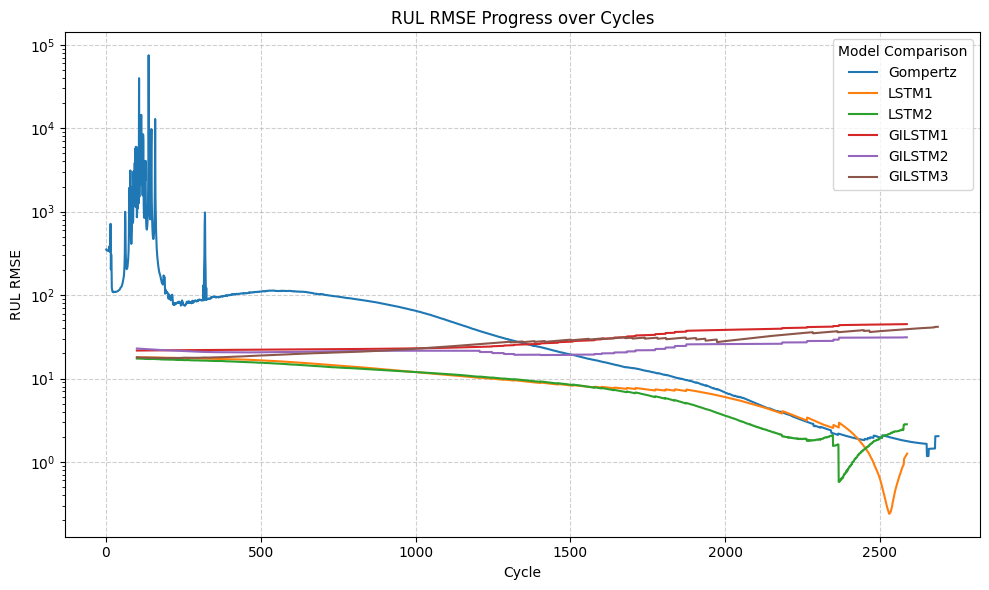

<Figure size 640x480 with 0 Axes>

In [3]:
#cycle rmses

plt.figure(figsize=(10, 6))

# 2. Iterate and plot each one
for label, data_dict in cycle_rmses.items():
    # Sorting keys (cycles) to ensure the line is drawn correctly
    sorted_cycles = sorted(data_dict.keys())
    rmse_values = [data_dict[c] for c in sorted_cycles]
    
    plt.plot(sorted_cycles, rmse_values, linestyle='-', label=label)

# 3. Add formatting
plt.xlabel('Cycle')
plt.ylabel('RUL RMSE')
plt.yscale('log')
plt.title('RUL RMSE Progress over Cycles')
plt.legend(title="Model Comparison") # Displays the labels
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# 4. Show or Save the plot
plt.show()
plt.savefig('rmse_comparison.png')

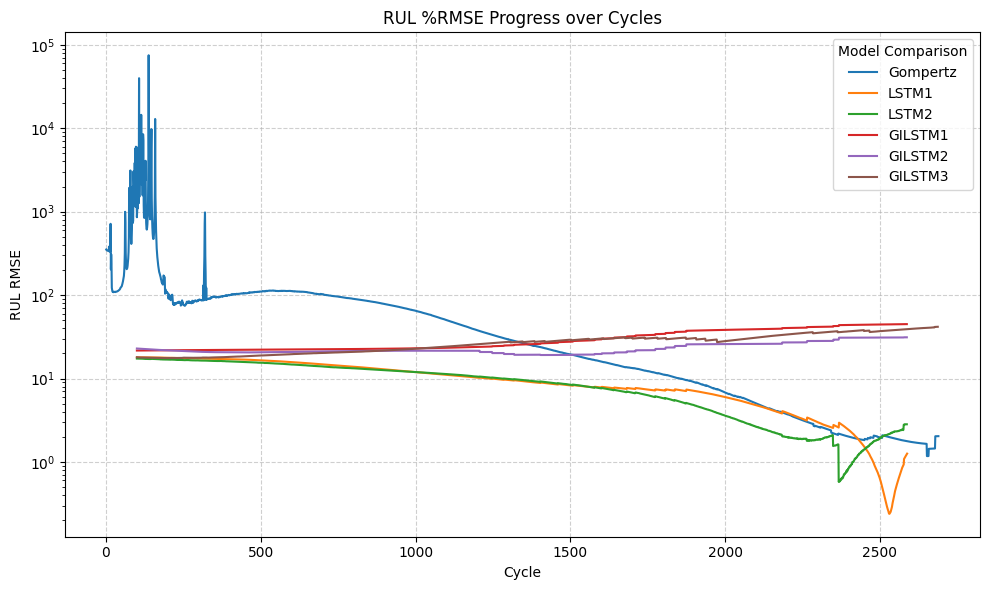

<Figure size 640x480 with 0 Axes>

In [4]:
#cycle nrmses

plt.figure(figsize=(10, 6))

# 2. Iterate and plot each one
for label, data_dict in cycle_nrmses.items():
    # Sorting keys (cycles) to ensure the line is drawn correctly
    sorted_cycles = sorted(data_dict.keys())
    rmse_values = [data_dict[c] for c in sorted_cycles]
    
    plt.plot(sorted_cycles, rmse_values, linestyle='-', label=label)

# 3. Add formatting
plt.xlabel('Cycle')
plt.ylabel('RUL RMSE')
plt.yscale('log')
plt.title('RUL %RMSE Progress over Cycles')
plt.legend(title="Model Comparison") # Displays the labels
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# 4. Show or Save the plot
plt.show()
plt.savefig('nrmse_comparison.png')

/tmp/ipykernel_266906/1127775330.py:29: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(False, linestyle='--', alpha=0.6)


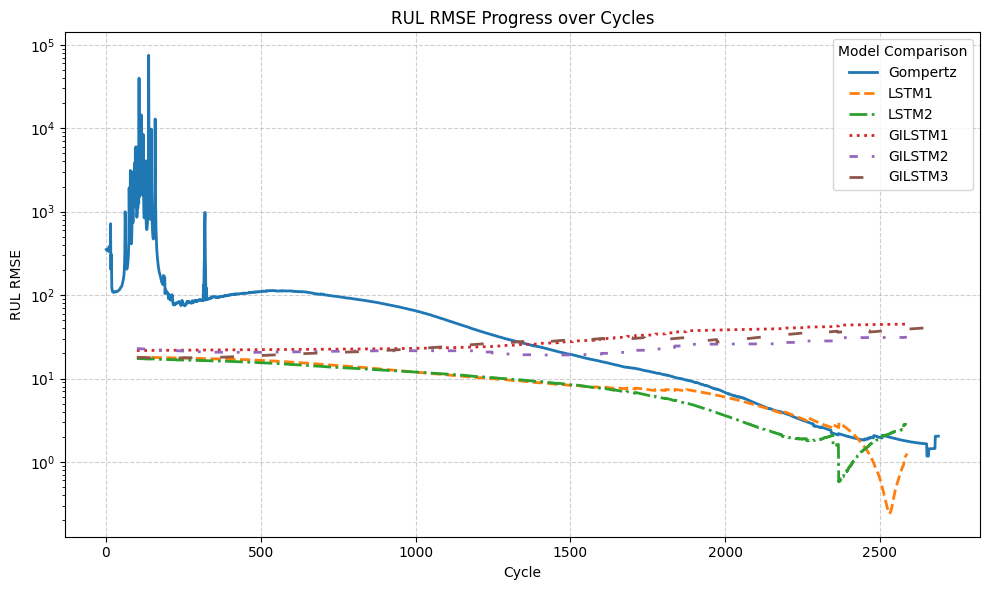

In [9]:
# Common styles: '-' (solid), '--' (dashed), '-.' (dash-dot), ':' (dotted)
line_styles = ['-', '--', '-.', ':', (0, (3, 5, 1, 5)), (0, (5, 10))]
markers = ['o', 's', '^', 'D', 'x','y']
plt.figure(figsize=(10, 6))

# 2. Iterate with index to pick a linestyle
for i, (label, data_dict) in enumerate(cycle_rmses.items()):
    sorted_cycles = sorted(data_dict.keys())
    rmse_values = [data_dict[c] for c in sorted_cycles]
    
    # Use the index 'i' to pick a style, using modulo (%) to avoid index errors 
    # if you have more models than defined styles
    current_style = line_styles[i % len(line_styles)]
    
    plt.plot(sorted_cycles, rmse_values, 
             linestyle=current_style, 
             label=label, 
             linewidth=2)
    #plt.plot(..., marker=markers[i % len(markers)], markevery=10) # markevery prevents clutter

# 3. Add formatting
plt.xlabel('Cycle')
plt.ylabel('RUL RMSE')
plt.yscale('log')
plt.title('RUL RMSE Progress over Cycles')
plt.style.use('tableau-colorblind10')
# Enhance the legend for readability
plt.legend(title="Model Comparison", loc='best', frameon=True)
plt.grid(False, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()